This notebook demonstrate the process of building image Classification system. The dataset is MNIST dataset, which is a set of 70,000(test=10000 & train=60000) small images of digits
handwritten by high school students and employees of the US Census Bureau.

let's get started

Each row in the dataset contain information of a particular digit, in each row you will find a total of 785 features, 784 features representing pixel information of the digit and the remaining one feature representing the digit value ranging from 0 - 9

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_val_predict                      
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier



In [3]:
# let's load the dataset;
train_path = "/storage/emulated/0/csv/mnist/mnist_train.csv"
test_path = "/storage/emulated/0/csv/mnist/mnist_test.csv"
train = pd.read_csv(train_path)                                                   
test = pd.read_csv(test_path)

# let's have a look at the dataset;
train


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


i don't lie, here it is as i described it,

In [4]:
# let's seperate the predictors and label in the training set.                                
x = np.array(train.drop(columns=["label"]))
y = np.array(train["label"])


In [5]:
# let's get thier shapes;
print("X: ", x.shape) # (60000, 784)
print("Y: ", y.shape) # (60000)

X:  (60000, 784)
Y:  (60000,)


Let’s take a peek at
one digit from the dataset. All we need to do is grab an instance’s feature vector, reshape it to a 28×28
array, and display it using Matplotlib’s imshow() function, let's grab our gears


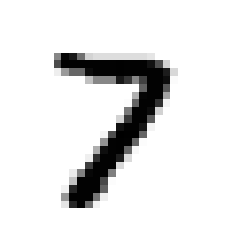

In [6]:
one_digit = x[4000]
digit = one_digit.reshape(28, 28)                                                

plt.imshow(digit, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()



this looks like a seven, let's get it label to confirm this.

In [7]:
digit = y[4000]
digit



7

And voila, it is seven indeed

In [8]:
# let's seperate the predictors and label in the test set.                                
x_test= np.array(test.drop(columns=["label"]))
y_test = np.array(test["label"])

print("x_test: ", x_test.shape) # (10000, 785)
print("y_test: ", y_test.shape) # (10000)


x_test:  (10000, 784)
y_test:  (10000,)


And now, we have our test set seperate from the training set. Each of the set have their predictor/features seperate from their labels

Let’s also shuffle the training set; this will guarantee that all cross-validation folds will be similar (you
don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the
order of the training instances, and they perform poorly if they get many similar instances in a row.
Shuffling the dataset ensures that this won’t happen


In [9]:
shuffle_index = np.random.permutation(60000)                       
x_train, y_train = x[shuffle_index], y[shuffle_index]



starting with a simple Ml algorithm when training model is a good approach, because at the end of the day, a dataset will choose the perfect algorithm for itself and not you will be choosing for it.

so let's start training our model, Let’s simplify the problem for now and only try to identify one digit.

for example, the number 7. This “7-
detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 7
and not-7. Let’s create the target vectors for this classification task


In [10]:
y_train_7 = (y_train == 7) # create a Boolean label array for the training set.                          
y_test_7 = (y_test == 7) # create a Boolean label array for the test set

# let's verify that;
y_train_7[1000]  # false


False

Okay, now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent
(SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable
of handling very large datasets efficiently. This is in part because SGD deals with training instances
independently, one at a time (which also makes SGD well suited for online learning), as we will see later.
Let’s create an SGDClassifier and train it on the whole training set:


In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_7)



SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(x_train, y_train_7)

Now you can use it to detect images of the number 7, 
let's verify this using the image we plot earlier

In [14]:
sgd_clf.predict([one_digit])                                     

# this will output True, 
# because the image plotted ealier is seven(7)



array([ True])

Looks like it guessed right in this particular
case! Now, let’s evaluate this model’s performance

let's measure the accuracy of the model using cross validation of 3 folds

In [15]:
cross_val_score(sgd_clf, x_train, y_train_7, cv=3,
                scoring="accuracy")



array([0.98145, 0.9766 , 0.97795])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing,
doesn’t it? Well, before you get too excited just know that even a dummy classifier that just classify every image as not seven will have an accuracy of 90% because image that are seven are just like 10% of the dataset.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers,
especially when you are dealing with skewed datasets. And that leads us to the confusion matrix.


A much better way to evaluate the performance of a classifier is to look at the confusion matrix

In [18]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_7, cv=3)                       
confusion_matrix(y_train_7, y_train_pred)



array([[53360,   375],
       [  905,  5360]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted
class. The first row of this matrix considers non-7 images (the negative class): 53,360 of them were
correctly classified as non-7s (they are called true negatives), while the remaining 375 were wrongly
classified as 7s (false positives). The second row considers the images of 7s (the positive class): 905
were wrongly classified as non-7s (false negatives), while the remaining 5,360 were correctly classified as
7s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion
matrix would have nonzero values only on its main diagonal (top left to bottom right):

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.
some interesting are the precision and recall

Scikit-Learn provides several functions to compute classifier metrics, including precision and recall, let's get it


In [20]:
# let's see the precision of our sgd clf;
# precious = TP/TP+FP
precision_score(y_train_7, y_train_pred)


0.934612031386225

In [21]:
# let's see the recall of our sgd clf;
# recall = TP/TP+FN
recall_score(y_train_7, y_train_pred)


0.8555466879489226

Now our 7-detector does not look as shiny as before but i must say, its actually a good dectector of 7, 

With precision of 0.9, for every 10 image it say are 7,    9 of it will be 7

With recall of 0.85, it predict 85% of the seven correctly

ww can even combine the two metric into a single one with F1 score

In [26]:
# output the F1 score of our model
f1_score(y_train_7, y_train_pred)

0.8933333333333334

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in
some contexts you mostly care about precision, and in other contexts you really care about recall.
Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is
called the precision/recall tradeoff

it's time to do more than just predict 7s,
let's move to multi-classification task

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial
classifiers) can distinguish between more than two classes.


with the help sklearn, some binary classify can be use for multi-class classification,
what sklearn does is train instances on many binary classify using one vs all or one vs one

let use sgd clf which is a binary classifier for multi-class classification

In [27]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([one_digit]) # output 7


array([7])

Training a multi-class RandomForestClassifier is just as easy:

In [30]:
forest_clf = RandomForestClassifier(random_state=42)



In [31]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([one_digit]) # output 7



array([7])

Now of course it's time to evaluate these classifiers. As usual, let's evaluate the SGDClassifier’s accuracy using the cross_val_score() function:


In [32]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")                    



NameError: name 'X_train' is not defined